<a href="https://colab.research.google.com/github/Pragya-code/Final_Assignment1_AI/blob/main/2505496_Pragya_Rajbanshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pragya Rajbanshi

Group : L5CG3

University ID : 2505496

Concepts and Technologies of AI

Final Assignment 1

3. Problem 1

Basic Data Exploration & Trend Visualization

3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

In [4]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv(
    "/content/drive/MyDrive/Final_assign_1/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)


# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)



# 1. Extract Latest Year (2022)

# 1.1 Identify unique years
unique_years = sorted(df['year'].unique())
print("Unique Years:", unique_years)



# 1.2 Filter dataset for year 2022
hdi_2022_df = df[df['year'] == 2022]



# 1.3 Save filtered dataframe
hdi_2022_df = hdi_2022_df.copy()



# 2. Data Exploration

# 2.1 Display first 10 rows
print("\nFirst 10 rows of 2022 data:")
display(hdi_2022_df.head(10))



# 2.2 Number of rows and columns
print("\nShape (rows, columns):", hdi_2022_df.shape)



# 2.3 Column names and data types
print("\nColumn names and data types:")
display(pd.DataFrame(hdi_2022_df.dtypes, columns=['Data Type']).style)



# 3. Missing Values & Data Cleaning

# 3.1 Check missing values
print("\nMissing values in each column:")
display(hdi_2022_df.isnull().sum().to_frame(name="Missing Values").style)



# 3.2 Replace special characters like "–" with NaN
hdi_2022_df.replace("–", np.nan, inplace=True)



# 3.3 Convert numeric columns stored as text to numeric
numeric_columns = ['hdi', 'gross_inc_percap', 'life_expectancy', 'gender_development']
for col in numeric_columns:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')



# 3.4 Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)



# 3.5 Handle missing values
# Dropping rows where HDI is missing because HDI is the main variable
hdi_2022_df.dropna(subset=['hdi'], inplace=True)



# 4. Basic Statistics

# 4.1 Mean, Median, Standard Deviation of HDI
stats = {
    'Mean': hdi_2022_df['hdi'].mean(),
    'Median': hdi_2022_df['hdi'].median(),
    'Std Dev': hdi_2022_df['hdi'].std()
}
print("\nHDI Statistics for 2022:")
display(pd.DataFrame([stats]).style.format("{:.3f}"))



# 4.2 Country with highest HDI
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country', 'hdi']]
print("\nCountry with Highest HDI:")
display(highest_hdi_country.to_frame().T.style)



# 4.3 Country with lowest HDI
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]
print("\nCountry with Lowest HDI:")
display(lowest_hdi_country.to_frame().T.style)



# 5. Filtering and Sorting

# 5.1 Filter countries with HDI > 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]



# 5.2 Sort by GNI per capita in descending order
high_hdi_sorted = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)



# 5.3 Display top 10 countries
print("\nTop 10 countries with HDI > 0.800 sorted by GNI per capita:")
display(high_hdi_sorted.head(10)[['country', 'hdi', 'gross_inc_percap']].style.format({'hdi': '{:.3f}', 'gross_inc_percap': '{:.0f}'}))



# 6. Adding HDI Category Column

# 6.1 Create HDI Category column
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.699:
        return "Medium"
    elif 0.700 <= hdi <= 0.799:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)



# 6.2 Verify classification
print("\nHDI Category counts:")
display(hdi_2022_df['HDI Category'].value_counts().to_frame(name='Count').style)



# 6.3 Save final dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

print("\nFile saved as: HDI_category_added.csv")
from google.colab import files
files.download("HDI_category_added.csv")

Unique Years: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

First 10 rows of 2022 data:


,unnamed:_0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621



Shape (rows, columns): (206, 30)

Column names and data types:


,Data Type
unnamed:_0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64



Missing values in each column:


,Missing Values
unnamed:_0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0



HDI Statistics for 2022:


,Mean,Median,Std Dev
0,0.723,0.740,0.153



Country with Highest HDI:


,country,hdi
5609,Switzerland,0.967000



Country with Lowest HDI:


,country,hdi
5345,Somalia,0.380000



Top 10 countries with HDI > 0.800 sorted by GNI per capita:


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673
4718,Qatar,0.875,95944
5213,Singapore,0.949,88761
2705,Ireland,0.950,87468
3398,Luxembourg,0.927,78554
6104,United Arab Emirates,0.937,74104
5609,Switzerland,0.967,69433
4322,Norway,0.966,69190
6170,United States,0.927,65565
2474,"Hong Kong, China (SAR)",0.956,62486



HDI Category counts:


,Count
HDI Category,
Very High,71
High,54
Medium,44
Low,35



File saved as: HDI_category_added.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3.2. Problem - 1B - HDI Visualization and Trend Analysis (2020 - 2022)

Filtered dataset saved as HDI_problem1B.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Missing values (essential columns):


,Missing
hdi,8
country,0
year,0


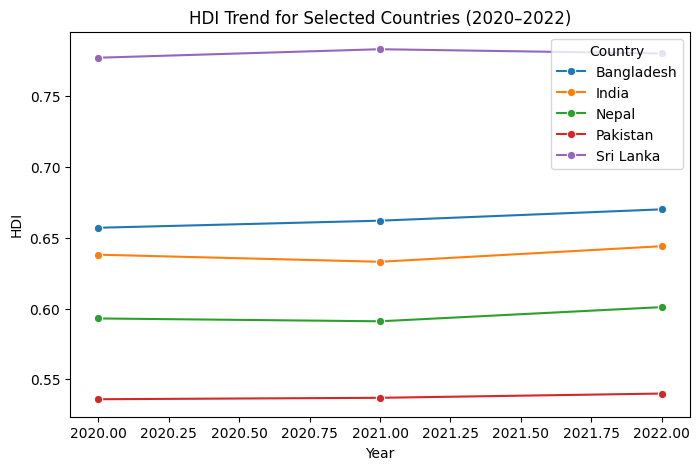

Interpretation: Most selected countries show gradual HDI improvement after 2020.
Region column not available in the dataset.


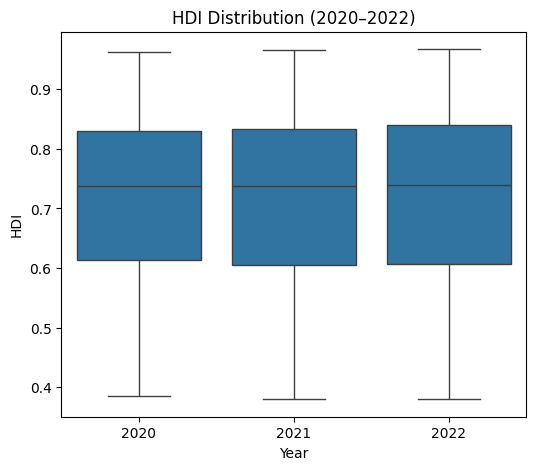

Interpretation: HDI distribution shows slight recovery after the COVID-19 period.


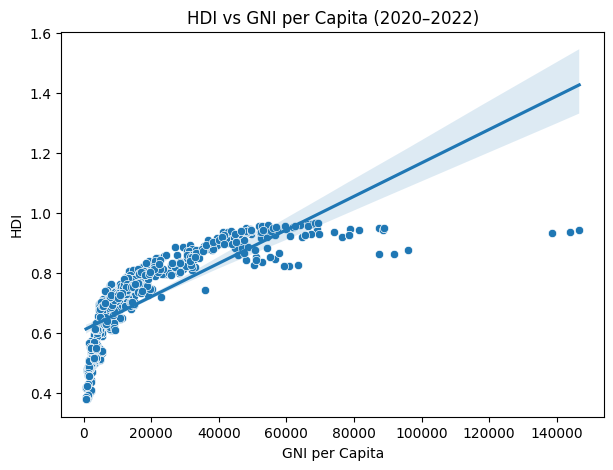

Interpretation: Higher GNI per capita generally corresponds to higher HDI.

Countries with greatest HDI improvement (2020–2022):


year,2020,2021,2022,change_2020_2022
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024



Countries with HDI decline (2020–2022):


year,2020,2021,2022,change_2020_2022
country,,,,
Afghanistan,0.488,0.473,0.462,-0.026
Angola,0.594,0.590,0.591,-0.003
Australia,0.948,0.949,0.946,-0.002
Belize,0.705,0.698,0.700,-0.005
Brunei Darussalam,0.827,0.824,0.823,-0.004



Interpretation:
- Some countries experienced HDI decline due to economic slowdown and health impacts of COVID-19.
- Regions with strong healthcare and social protection recovered faster.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


df = pd.read_csv(
    "/content/drive/MyDrive/Final_assign_1/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)


# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)



# 1. Data Extraction and Saving

# 1.1 Filter dataset for years 2020, 2021, 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()



# 1.2 Save filtered dataset
hdi_2020_2022_df.to_csv("HDI_problem1B.csv", index=False)

print("Filtered dataset saved as HDI_problem1B.csv")
from google.colab import files
files.download("HDI_problem1B.csv")



# 2. Data Cleaning

# 2.1 Check missing values in essential columns
print("\nMissing values (essential columns):")
display(hdi_2020_2022_df[['hdi', 'country', 'year']].isnull().sum().to_frame(name='Missing').style)



# 2.2 Replace special characters
hdi_2020_2022_df.replace("–", np.nan, inplace=True)


# 2.3 Convert numeric columns
numeric_columns = ['hdi', 'gross_inc_percap']
for col in numeric_columns:
    if col in hdi_2020_2022_df.columns:
        hdi_2020_2022_df[col] = pd.to_numeric(hdi_2020_2022_df[col], errors='coerce')



# 2.4 Remove duplicate rows
hdi_2020_2022_df.drop_duplicates(inplace=True)



# 2.5 Handle missing values
# Drop rows with missing HDI because HDI is the main variable
hdi_2020_2022_df.dropna(subset=['hdi', 'country', 'year'], inplace=True)


# 3. Visualization Tasks:
# 3A. Line Chart — HDI Trend (Country-Level)

# Select five countries
countries = ['Nepal', 'India', 'Bangladesh', 'Sri Lanka', 'Pakistan']
trend_df = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(data=trend_df, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend for Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend(title="Country")
plt.show()

print("Interpretation: Most selected countries show gradual HDI improvement after 2020.")



# 3B. Bar Chart — Average HDI by Region (2020–2022)

if 'region' in hdi_2020_2022_df.columns:
    region_avg = (
        hdi_2020_2022_df
        .groupby(['region', 'year'])['hdi']
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(10,5))
    sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
    plt.title("Average HDI by Region (2020–2022)")
    plt.xlabel("Region")
    plt.ylabel("Average HDI")
    plt.xticks(rotation=45)
    plt.show()

    print("Interpretation: Developed regions consistently show higher average HDI.")
else:
    print("Region column not available in the dataset.")




# 3B. Box Plot — HDI Distribution (2020–2022)
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_2020_2022_df, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

print("Interpretation: HDI distribution shows slight recovery after the COVID-19 period.")



# 3B. Scatter Plot — HDI vs GNI per Capita

if 'gross_inc_percap' in hdi_2020_2022_df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=hdi_2020_2022_df,
        x='gross_inc_percap',
        y='hdi'
    )
    sns.regplot(
        data=hdi_2020_2022_df,
        x='gross_inc_percap',
        y='hdi',
        scatter=False
    )
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.show()

    print("Interpretation: Higher GNI per capita generally corresponds to higher HDI.")
else:
    print("GNI per Capita variable not available in the dataset.")




# 4. Short Analysis Questions

# 4.1 Countries with greatest improvement
hdi_change = (
    hdi_2020_2022_df
    .pivot(index='country', columns='year', values='hdi')
)
hdi_change['change_2020_2022'] = hdi_change[2022] - hdi_change[2020]

print("\nCountries with greatest HDI improvement (2020–2022):")
display(hdi_change.sort_values('change_2020_2022', ascending=False).head(5).style.format("{:.3f}"))


# 4.2 Countries with HDI decline
print("\nCountries with HDI decline (2020–2022):")
declines = hdi_change[hdi_change['change_2020_2022'] < 0]
display(declines.head().style.format("{:.3f}"))

print("\nInterpretation:")
print("- Some countries experienced HDI decline due to economic slowdown and health impacts of COVID-19.")
print("- Regions with strong healthcare and social protection recovered faster.")


4. Problem 2

Advanced HDI Exploration

South Asia dataset saved as HDI_SouthAsia.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Composite Score Ranking (South Asia):


,country,composite_score,hdi
3530,Maldives,5678.289,0.762
5477,Sri Lanka,3592.833,0.780
659,Bhutan,3209.131,0.681
2573,India,2105.481,0.644
461,Bangladesh,1975.446,0.670
4388,Pakistan,1632.210,0.540
4091,Nepal,1228.812,0.601
32,Afghanistan,419.425,0.462


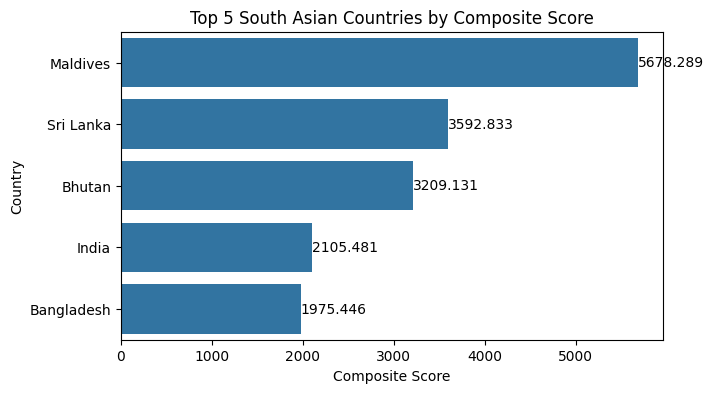

Interpretation: Composite ranking differs slightly from HDI due to income and life expectancy weighting.


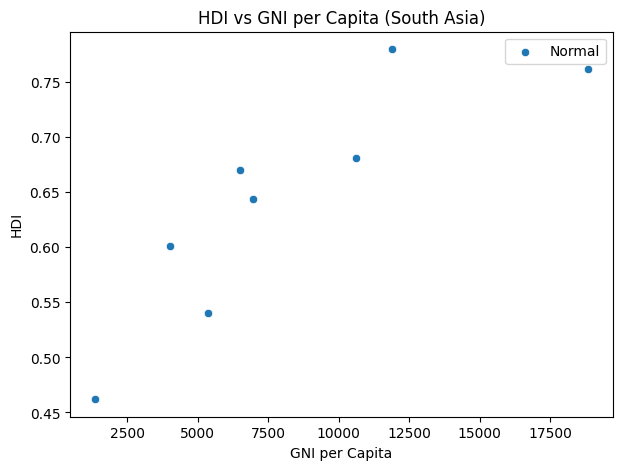

Interpretation: Outliers stand out due to unusually high or low income or HDI values.

Pearson correlation between HDI and gender_development: 0.884759535448765


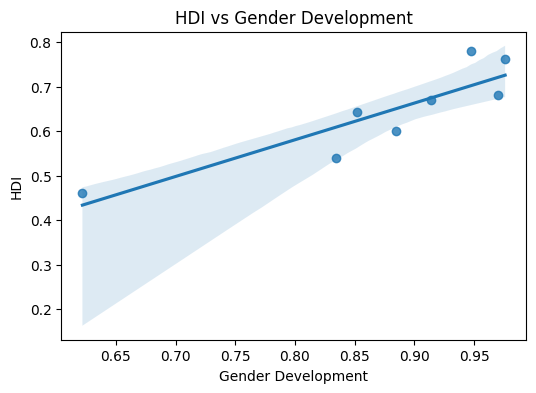


Pearson correlation between HDI and life_expectancy: 0.9281974040239385


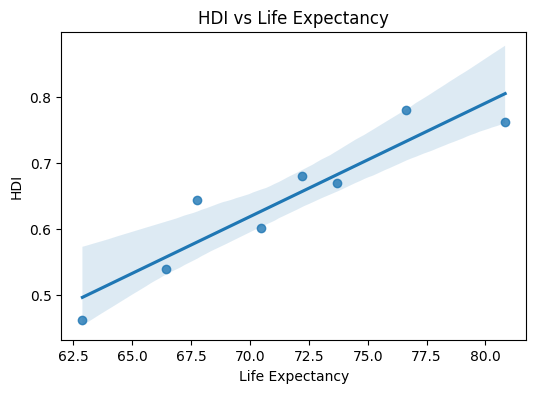

Interpretation: Life expectancy shows a stronger relationship with HDI than gender development.

Top 3 Positive GNI-HDI Gaps:


,country,gni_hdi_gap
3530,Maldives,18846.03
5477,Sri Lanka,11898.72
659,Bhutan,10624.19



Top 3 Negative GNI-HDI Gaps:


,country,gni_hdi_gap
32,Afghanistan,1334.74
4091,Nepal,4024.95
4388,Pakistan,5373.73


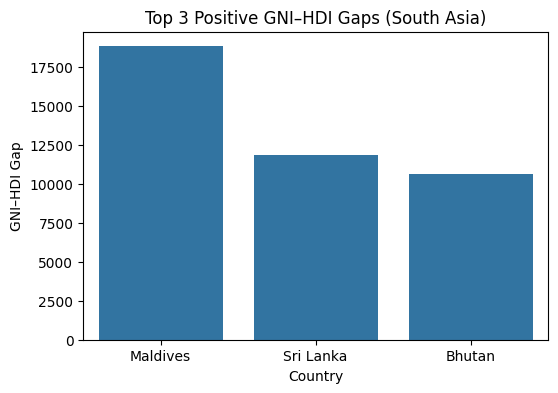

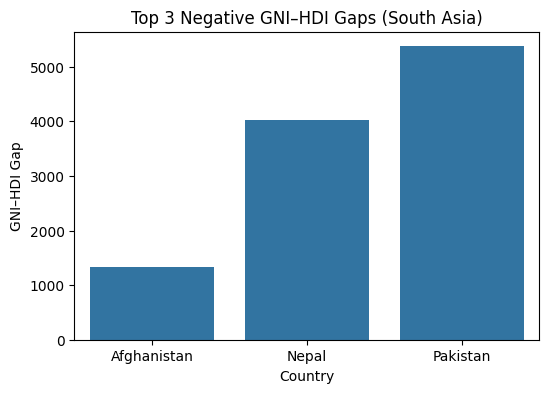

Interpretation: High gaps indicate income not fully translating into human development.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


df = pd.read_csv(
    "/content/drive/MyDrive/Final_assign_1/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)

# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


# 1. Create South Asia Subset

# 1.1 Define South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]



# 1.2 Filter dataset for South Asia
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()



# 1.3 Save dataset
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
print("South Asia dataset saved as HDI_SouthAsia.csv")
from google.colab import files
files.download("HDI_SouthAsia.csv")



# 2. Composite Development Score

# 2.1 Create a new metic called Composite Score using the formula:
south_asia_df['life_expectancy'] = pd.to_numeric(
    south_asia_df['life_expectancy'], errors='coerce'
)
south_asia_df['gross_inc_percap'] = pd.to_numeric(
    south_asia_df['gross_inc_percap'], errors='coerce'
)
south_asia_df['gender_development'] = pd.to_numeric(
    south_asia_df['gender_development'], errors='coerce'
)


# Handle missing values using mean imputation
south_asia_df['life_expectancy'] = south_asia_df['life_expectancy'].fillna(
    south_asia_df['life_expectancy'].mean()
)

south_asia_df['gross_inc_percap'] = south_asia_df['gross_inc_percap'].fillna(
    south_asia_df['gross_inc_percap'].mean()
)

south_asia_df['gender_development'] = south_asia_df['gender_development'].fillna(
    south_asia_df['gender_development'].mean()
)




# 2.2 Rank South Asian countries based on Composite Score
south_asia_df['composite_score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)



# 2.3 Rank countries by Composite Score (latest year only)
latest_year = south_asia_df['year'].max()
sa_latest = south_asia_df[south_asia_df['year'] == latest_year]

composite_rank = sa_latest.sort_values(
    by='composite_score', ascending=False
).dropna(subset=['composite_score'])

print("\nComposite Score Ranking (South Asia):")
display(composite_rank[['country', 'composite_score', 'hdi']].style.format({'composite_score': '{:.3f}', 'hdi': '{:.3f}'}))


# 2.4 Plot top 5 countries
top5 = composite_rank.head(5)
plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=composite_rank.head(5),
    x='composite_score',
    y='country'
)
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
for i, v in enumerate(top5['composite_score']):
    ax.text(v, i, f"{v:.3f}", va='center')
plt.show()

print("Interpretation: Composite ranking differs slightly from HDI due to income and life expectancy weighting.")




# 3. Outlier Detection (IQR Method)

# 3.1 IQR for HDI
Q1_hdi = sa_latest['hdi'].quantile(0.25)
Q3_hdi = sa_latest['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi



# 3.2 IQR for GNI
Q1_gni = sa_latest['gross_inc_percap'].quantile(0.25)
Q3_gni = sa_latest['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni



# 3.3 Identify outliers
outliers = sa_latest[
    (sa_latest['hdi'] < Q1_hdi - 1.5 * IQR_hdi) |
    (sa_latest['hdi'] > Q3_hdi + 1.5 * IQR_hdi) |
    (sa_latest['gross_inc_percap'] < Q1_gni - 1.5 * IQR_gni) |
    (sa_latest['gross_inc_percap'] > Q3_gni + 1.5 * IQR_gni)
]



# 3.4 Scatter plot highlighting outliers
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=sa_latest,
    x='gross_inc_percap',
    y='hdi',
    label='Normal'
)
sns.scatterplot(
    data=outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red',
    label='Outlier'
)
plt.title("HDI vs GNI per Capita (South Asia)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()

print("Interpretation: Outliers stand out due to unusually high or low income or HDI values.")




# 4. Exploring Metric Relationships

# 4.1 Select metrics
metrics = ['gender_development', 'life_expectancy']

for metric in metrics:
    if metric in sa_latest.columns:
        correlation = sa_latest[metric].corr(sa_latest['hdi'])
        print(f"\nPearson correlation between HDI and {metric}: {correlation}")

        plt.figure(figsize=(6,4))
        sns.regplot(
            data=sa_latest,
            x=metric,
            y='hdi'
        )
        plt.title(f"HDI vs {metric.replace('_', ' ').title()}")
        plt.xlabel(metric.replace('_', ' ').title())
        plt.ylabel("HDI")
        plt.show()

print("Interpretation: Life expectancy shows a stronger relationship with HDI than gender development.")



# 5. Gap Analysis

# 5.1 Create GNI-HDI Gap
sa_latest = sa_latest.copy()
sa_latest['gni_hdi_gap'] = sa_latest['gross_inc_percap'] - sa_latest['hdi']


# 5.2 Rank gaps
gap_desc = sa_latest.sort_values(by='gni_hdi_gap', ascending=False)
gap_asc = sa_latest.sort_values(by='gni_hdi_gap', ascending=True)

print("\nTop 3 Positive GNI-HDI Gaps:")
display(gap_desc[['country', 'gni_hdi_gap']].head(3).style.format({'gni_hdi_gap': '{:.2f}'}))

print("\nTop 3 Negative GNI-HDI Gaps:")
display(gap_asc[['country', 'gni_hdi_gap']].head(3).style.format({'gni_hdi_gap': '{:.2f}'}))



# 5.3 Plot gaps
plt.figure(figsize=(6,4))
sns.barplot(
    data=gap_desc.head(3),
    x='country',
    y='gni_hdi_gap'
)
plt.title("Top 3 Positive GNI–HDI Gaps (South Asia)")
plt.xlabel("Country")
plt.ylabel("GNI–HDI Gap")
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(
    data=gap_asc.head(3),
    x='country',
    y='gni_hdi_gap'
)
plt.title("Top 3 Negative GNI–HDI Gaps (South Asia)")
plt.xlabel("Country")
plt.ylabel("GNI–HDI Gap")
plt.show()

print("Interpretation: High gaps indicate income not fully translating into human development.")


5. Problem 3

Comparative Regional Analysis: South Asia vs Middle East

South Asia and Middle East datasets saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


HDI Statistics (2020–2022):
South Asia - Mean: 0.5516485355648534 Std: 0.11391822957881029
Middle East - Mean: 0.7391035502958581 Std: 0.12493064789638758

Better performing region on average: Middle East


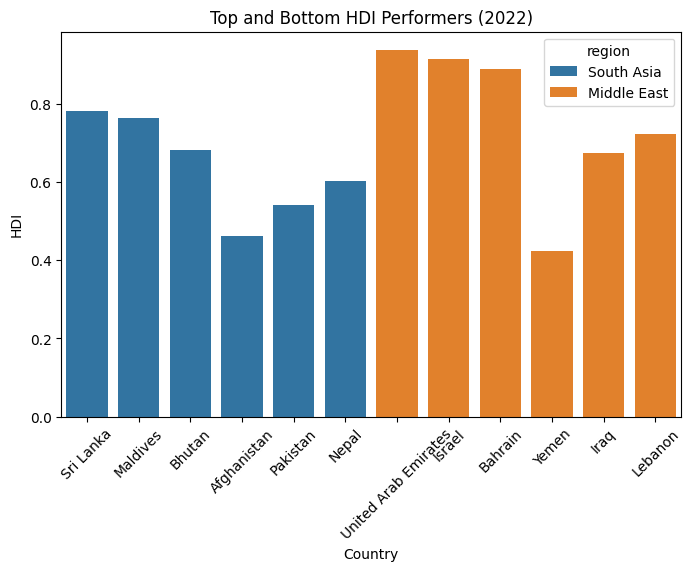

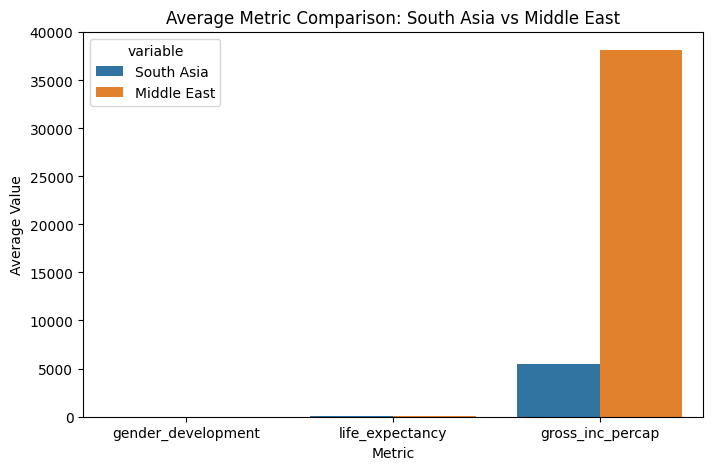

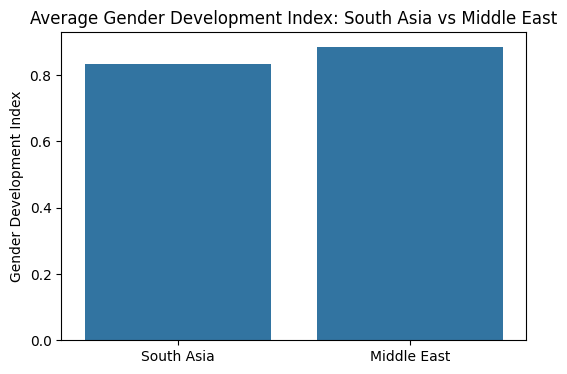

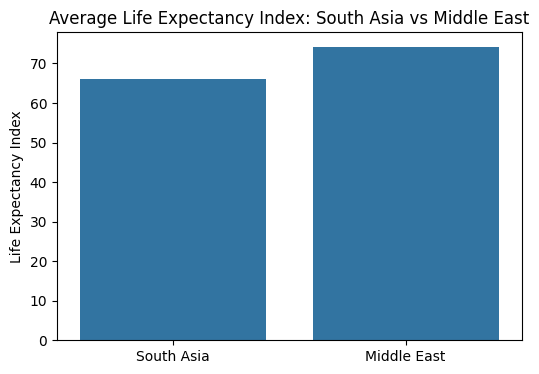

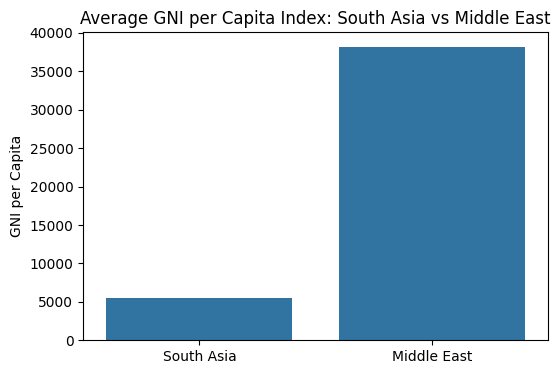

Interpretation: GNI per capita shows the greatest disparity between regions.

HDI Disparity:
South Asia - Range: 0.318 CV: 0.2065050883569648
Middle East - Range: 0.5130000000000001 CV: 0.16902996589094818
Region with more HDI variation: South Asia

Correlation Analysis for South Asia:
HDI vs gender_development: 0.884759535448765


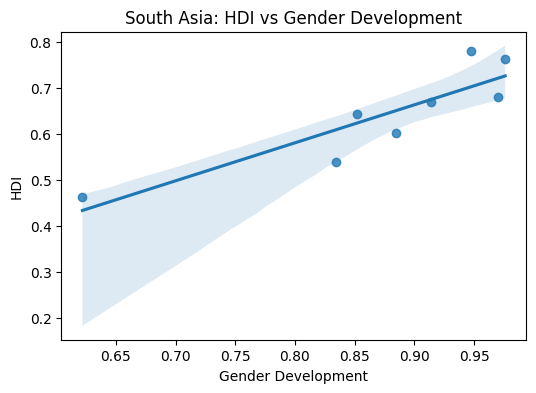

HDI vs life_expectancy: 0.9281974040239385


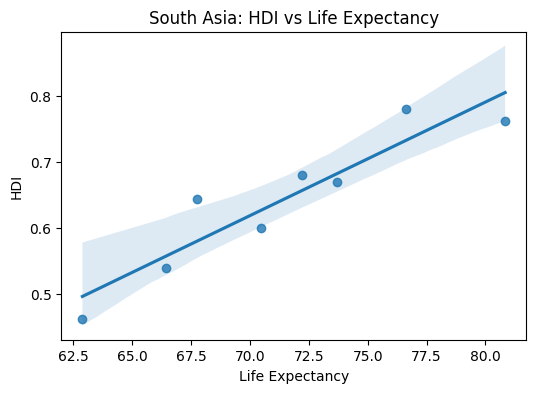


Correlation Analysis for Middle East:
HDI vs gender_development: 0.9369069522546871


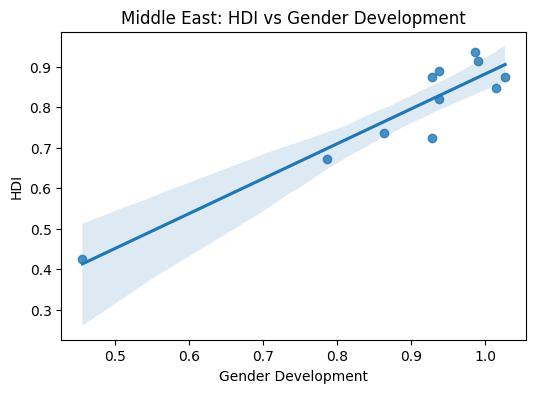

HDI vs life_expectancy: 0.9446425587486487


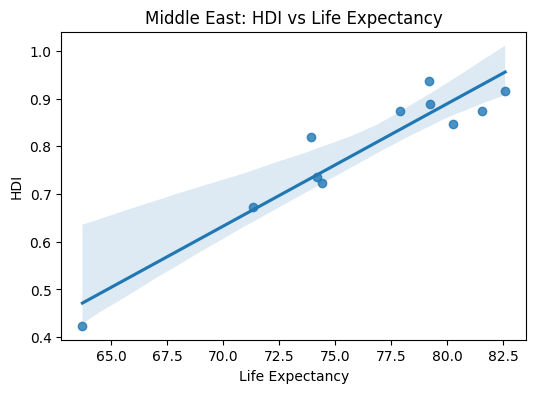

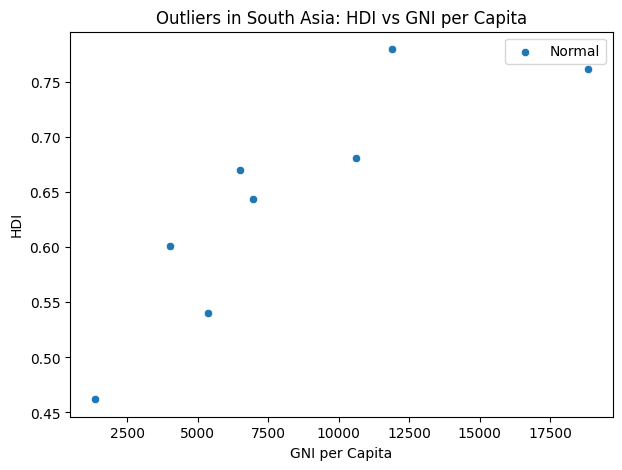

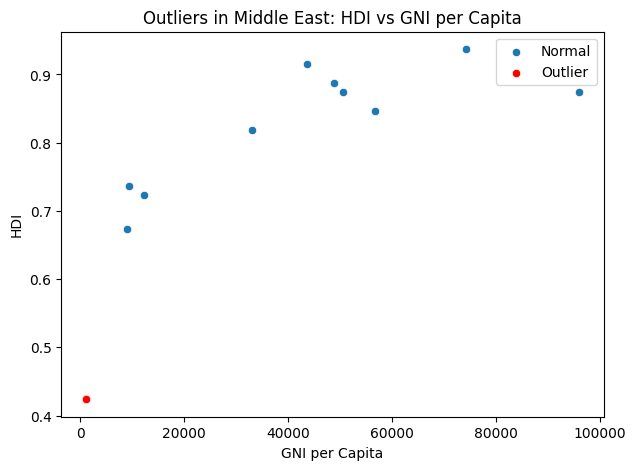

Interpretation: Outliers represent countries with unusually high or low income–development balance.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(
    "/content/drive/MyDrive/Final_assign_1/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)

# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


# 1. Create Middle East Subset:

# 1.1 Define country lists
south_asia_df = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


south_asia_df = df[df['country'].isin(south_asia_df)].copy()
middle_east_df = df[df['country'].isin(middle_east_df)].copy()


# 1.2 Filter datasets
for col in ['gender_development', 'life_expectancy', 'gross_inc_percap', 'hdi']:
    south_asia_df[col] = south_asia_df[col].fillna(south_asia_df[col].mean())
    middle_east_df[col] = middle_east_df[col].fillna(middle_east_df[col].mean())


# 1.3 Save subsets
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

print("South Asia and Middle East datasets saved.")
from google.colab import files
files.download("HDI_SouthAsia_2020_2022.csv")
from google.colab import files
files.download("HDI_MiddleEast_2020_2022.csv")




# 2. Descriptive Statistics

sa_mean = south_asia_df['hdi'].mean()
sa_std = south_asia_df['hdi'].std()

me_mean = middle_east_df['hdi'].mean()
me_std = middle_east_df['hdi'].std()

print("\nHDI Statistics (2020–2022):")
print("South Asia - Mean:", sa_mean, "Std:", sa_std)
print("Middle East - Mean:", me_mean, "Std:", me_std)

print("\nBetter performing region on average:",
      "Middle East" if me_mean > sa_mean else "South Asia")



# 3. Top and Bottom Performers

sa_latest = south_asia_df[south_asia_df['year'] == south_asia_df['year'].max()]
me_latest = middle_east_df[middle_east_df['year'] == middle_east_df['year'].max()]

sa_top_bottom = pd.concat([
    sa_latest.sort_values(by='hdi', ascending=False).head(3),
    sa_latest.sort_values(by='hdi').head(3)
])

me_top_bottom = pd.concat([
    me_latest.sort_values(by='hdi', ascending=False).head(3),
    me_latest.sort_values(by='hdi').head(3)
])

compare_df = pd.concat([
    sa_top_bottom.assign(region="South Asia"),
    me_top_bottom.assign(region="Middle East")
])

plt.figure(figsize=(8,5))
sns.barplot(data=compare_df, x='country', y='hdi', hue='region')
plt.title("Top and Bottom HDI Performers (2022)")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("HDI")
plt.show()



# 4. Metric Comparisons

metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

metric_avg = pd.DataFrame({
    'South Asia': south_asia_df[metrics].mean(),
    'Middle East': middle_east_df[metrics].mean()
}).reset_index().rename(columns={'index': 'metric'})

plt.figure(figsize=(8,5))
sns.barplot(data=metric_avg.melt(id_vars='metric'),
            x='metric', y='value', hue='variable')
plt.title("Average Metric Comparison: South Asia vs Middle East")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(
    x=['South Asia', 'Middle East'],
    y=[
        south_asia_df['gender_development'].mean(),
        middle_east_df['gender_development'].mean()
    ]
)
plt.title("Average Gender Development Index: South Asia vs Middle East")
plt.ylabel("Gender Development Index")
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(
    x=['South Asia', 'Middle East'],
    y=[
        south_asia_df['life_expectancy'].mean(),
        middle_east_df['life_expectancy'].mean()
    ]
)
plt.title("Average Life Expectancy Index: South Asia vs Middle East")
plt.ylabel("Life Expectancy Index")
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(
    x=['South Asia', 'Middle East'],
    y=[
        south_asia_df['gross_inc_percap'].mean(),
        middle_east_df['gross_inc_percap'].mean()
    ]
)
plt.title("Average GNI per Capita Index: South Asia vs Middle East")
plt.ylabel("GNI per Capita")
plt.show()

print("Interpretation: GNI per capita shows the greatest disparity between regions.")



# 5. HDI Disparity

sa_range = sa_latest['hdi'].max() - sa_latest['hdi'].min()
me_range = me_latest['hdi'].max() - me_latest['hdi'].min()

sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print("\nHDI Disparity:")
print("South Asia - Range:", sa_range, "CV:", sa_cv)
print("Middle East - Range:", me_range, "CV:", me_cv)

print("Region with more HDI variation:",
      "South Asia" if sa_cv > me_cv else "Middle East")



# 6. Correlation Analysis

for region_name, region_df in [("South Asia", sa_latest), ("Middle East", me_latest)]:
    print(f"\nCorrelation Analysis for {region_name}:")
    for metric in ['gender_development', 'life_expectancy']:
        corr = region_df[metric].corr(region_df['hdi'])
        print(f"HDI vs {metric}: {corr}")

        plt.figure(figsize=(6,4))
        sns.regplot(data=region_df, x=metric, y='hdi')
        plt.title(f"{region_name}: HDI vs {metric.replace('_', ' ').title()}")
        plt.xlabel(metric.replace('_', ' ').title())
        plt.ylabel("HDI")
        plt.show()




# 7. Outlier Detection

def detect_outliers(df_region):
    Q1_hdi = df_region['hdi'].quantile(0.25)
    Q3_hdi = df_region['hdi'].quantile(0.75)
    IQR_hdi = Q3_hdi - Q1_hdi

    Q1_gni = df_region['gross_inc_percap'].quantile(0.25)
    Q3_gni = df_region['gross_inc_percap'].quantile(0.75)
    IQR_gni = Q3_gni - Q1_gni

    return df_region[
        (df_region['hdi'] < Q1_hdi - 1.5 * IQR_hdi) |
        (df_region['hdi'] > Q3_hdi + 1.5 * IQR_hdi) |
        (df_region['gross_inc_percap'] < Q1_gni - 1.5 * IQR_gni) |
        (df_region['gross_inc_percap'] > Q3_gni + 1.5 * IQR_gni)
    ]

sa_outliers = detect_outliers(sa_latest)
me_outliers = detect_outliers(me_latest)

for name, data, out in [
    ("South Asia", sa_latest, sa_outliers),
    ("Middle East", me_latest, me_outliers)
]:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=data, x='gross_inc_percap', y='hdi', label='Normal')
    sns.scatterplot(data=out, x='gross_inc_percap', y='hdi',
                    color='red', label='Outlier')
    plt.title(f"Outliers in {name}: HDI vs GNI per Capita")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.legend()
    plt.show()

print("Interpretation: Outliers represent countries with unusually high or low income–development balance.")
